In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<AxesSubplot:>

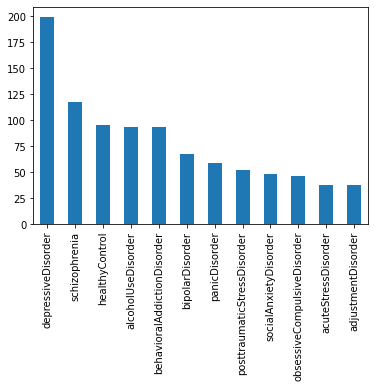

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='specific.disorder'>

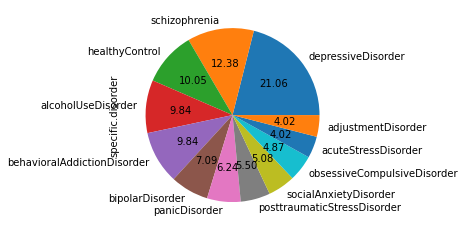

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [11]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,12,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,12,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,12,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,12,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [12]:
# Generating a correlation matrix
corr = eegDatasetCleaned.corr()

<AxesSubplot:>

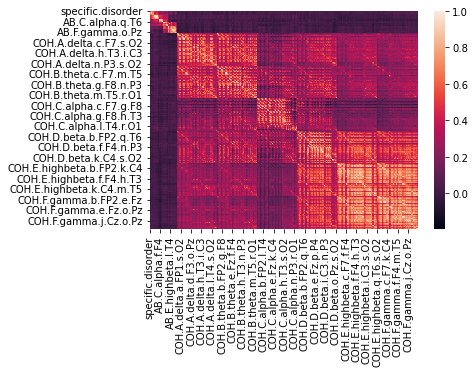

In [13]:
import seaborn as sns

# Generating a correlation heatmap to visually observe best correlations
sns.heatmap(corr)

In [14]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [15]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Handling Imbalanced Dataset
# SMOTE (Synthetic Minority Oversampling Technique) will be used as it helps with oversampling the examples
# in the minority class.

# Select random data from the minority class.
# Calculate the Euclidean distance between the random data and its k nearest neighbors.
# Multiply the difference with a random number between 0 and 1. Then, add the result to the minority class as a synthetic sample.
# Repeat the procedure until the expected proportion of minority class is met.

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
xSmote, ySmote = resample.fit_resample(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'])

In [16]:
# Prints information about the EEG training smote dataset.
xSmote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Columns: 1140 entries, AB.A.delta.a.FP1 to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140)
memory usage: 20.8 MB


In [17]:
# Prints information about the EEG true smote dataset.
ySmote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2388 entries, 0 to 2387
Series name: specific.disorder
Non-Null Count  Dtype
--------------  -----
2388 non-null   int64
dtypes: int64(1)
memory usage: 18.8 KB


In [18]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRAINING DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG training dataset shape after smote: \n', xSmote.shape)


 EEG TRAINING DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG training dataset shape after smote: 
 (2388, 1140)


In [19]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG true value dataset shape after smote: \n', ySmote.shape)


 EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG true value dataset shape after smote: 
 (2388,)


<AxesSubplot:>

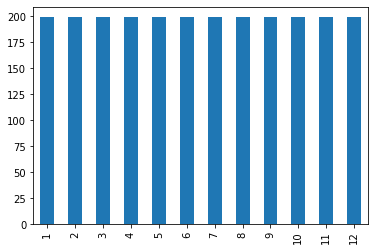

In [20]:
# Creating a visual plot to observe the y values after smote applied.
ySmote.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='specific.disorder'>

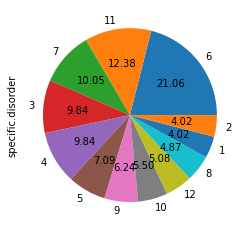

In [21]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [22]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(xSmote, ySmote, test_size=0.3, random_state=42)

In [27]:
import optuna
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define hyperparameters
    md = trial.suggest_int('max_depth', 2, 64)
    mi = trial.suggest_int('min_inst', 1, 32)

    # Create and train the model
    tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=mi, random_state=42)
    tree.fit(X_train, y_train)

    # Evaluate the model
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [28]:
# Creating and running our optimization
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2023-08-23 18:54:42,053] A new study created in memory with name: no-name-da38dab2-f20d-41a4-99b2-467e9e4c5d20
[I 2023-08-23 18:54:43,680] Trial 0 finished with value: 0.34449093444909346 and parameters: {'max_depth': 10, 'min_inst': 22}. Best is trial 0 with value: 0.34449093444909346.
[I 2023-08-23 18:54:45,187] Trial 1 finished with value: 0.37517433751743373 and parameters: {'max_depth': 40, 'min_inst': 16}. Best is trial 1 with value: 0.37517433751743373.
[I 2023-08-23 18:54:46,462] Trial 2 finished with value: 0.32357043235704325 and parameters: {'max_depth': 15, 'min_inst': 32}. Best is trial 1 with value: 0.37517433751743373.
[I 2023-08-23 18:54:47,743] Trial 3 finished with value: 0.32357043235704325 and parameters: {'max_depth': 18, 'min_inst': 32}. Best is trial 1 with value: 0.37517433751743373.
[I 2023-08-23 18:54:49,524] Trial 4 finished with value: 0.4755927475592748 and parameters: {'max_depth': 33, 'min_inst': 5}. Best is trial 4 with value: 0.4755927475592748.
[I 2

In [29]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'max_depth': 59, 'min_inst': 1}
Best RMSE: 0.5230125523012552


In [23]:
from sklearn import tree

# Importing the decision tree api and setting a default model with decision tree configurations.
model = tree.DecisionTreeClassifier(max_depth=59)

In [24]:
# Below I am training the model with the data previously set.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=59)

In [25]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.5313807531380753

In [26]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([11,  1,  5, 12, 10,  3,  5, 10,  1,  8,  4,  8, 11,  2,  2,  8,  5,
        8,  3, 12,  8,  6,  1,  1, 10, 11,  4,  8,  3,  1,  6,  2,  5,  8,
        7, 10,  7,  2,  3, 10, 10,  7, 11, 12,  8,  4,  9,  3, 10,  5, 11,
        8,  3,  8,  1, 12,  9,  6,  3, 10,  4,  9,  3,  5, 11,  2,  5,  3,
        2,  3,  3, 11, 10, 11,  9,  3, 10,  2,  8,  1,  2, 12,  9,  1, 10,
        5,  8,  3,  7, 12, 11,  4,  8,  9,  9,  7,  3, 11,  3,  1,  9,  9,
        4,  8,  4, 10,  2,  3, 12,  8,  4,  2,  3,  9,  1,  7,  8,  7, 10,
        1,  2,  8,  7, 11,  5,  1,  9,  9,  2,  9,  3, 12,  9,  9, 12,  3,
        3,  7, 11,  1,  1, 11, 12,  4,  2, 12,  8,  9,  9,  2, 12,  3,  4,
        5,  5, 12, 11,  1, 11,  4, 12,  1, 10,  7, 10,  9,  7, 12,  7,  7,
       11, 10,  8,  9,  5, 11,  9,  6, 11, 12,  6,  8, 12,  2,  8,  8,  9,
        3, 11,  7,  2,  7,  5,  2,  6, 10,  4,  3, 10,  3,  6,  1,  9,  9,
       10,  8,  1, 12,  4, 11,  7,  2,  7,  4, 11,  4,  3,  1, 10, 11,  4,
        6,  6, 11,  1,  3

In [27]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[49,  0,  2,  0,  3,  1,  1,  0,  0,  0,  2,  0],
       [ 2, 38,  3,  2,  1,  6,  0,  2,  1,  2,  2,  1],
       [ 3,  1, 26,  1,  3,  4,  8,  1,  1,  1,  4,  4],
       [ 7,  2,  4, 32,  2,  3,  8,  3,  7,  1,  3,  3],
       [ 1,  0,  1,  4, 37,  5,  3,  0,  0,  2,  3,  4],
       [ 4,  2,  8,  4,  7, 10,  4,  6,  5,  5,  6,  5],
       [ 1,  3,  4,  5,  2,  2, 28,  3,  3,  2,  5,  1],
       [ 2,  1,  1,  0,  3,  3,  4, 38,  2,  2,  7,  2],
       [ 2,  1,  1,  0,  1,  2,  2,  0, 35,  3,  2,  3],
       [ 3,  0,  1,  1,  2,  2,  3,  1,  3, 31,  3,  3],
       [ 1,  3,  5,  4,  1,  3,  1,  1,  2,  7, 27,  5],
       [ 0,  4,  1,  0,  2,  2,  1,  0,  0,  6,  6, 30]], dtype=int64)

Text(87.0, 0.5, 'True value')

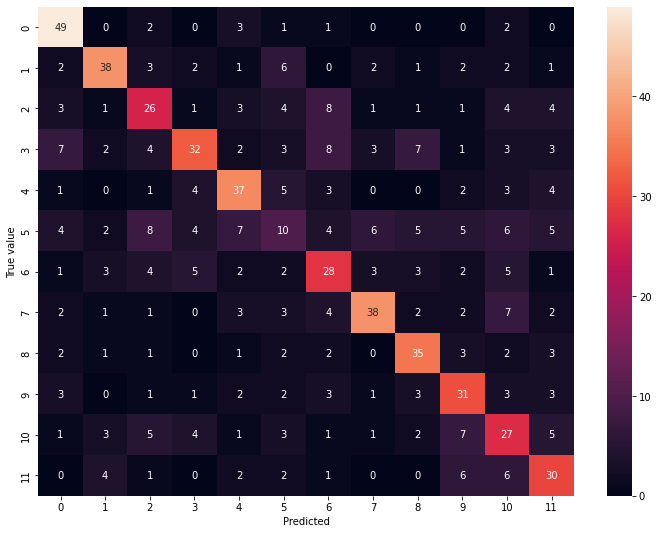

In [28]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (10,5) incorrect classifications represents how schizophrenia with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [29]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.65      0.84      0.74        58
           2       0.69      0.63      0.66        60
           3       0.46      0.46      0.46        57
           4       0.60      0.43      0.50        75
           5       0.58      0.62      0.60        60
           6       0.23      0.15      0.18        66
           7       0.44      0.47      0.46        59
           8       0.69      0.58      0.63        65
           9       0.59      0.67      0.63        52
          10       0.50      0.58      0.54        53
          11       0.39      0.45      0.42        60
          12       0.49      0.58      0.53        52

    accuracy                           0.53       717
   macro avg       0.53      0.54      0.53       717
weighted avg       0.53      0.53      0.52       717



In [30]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


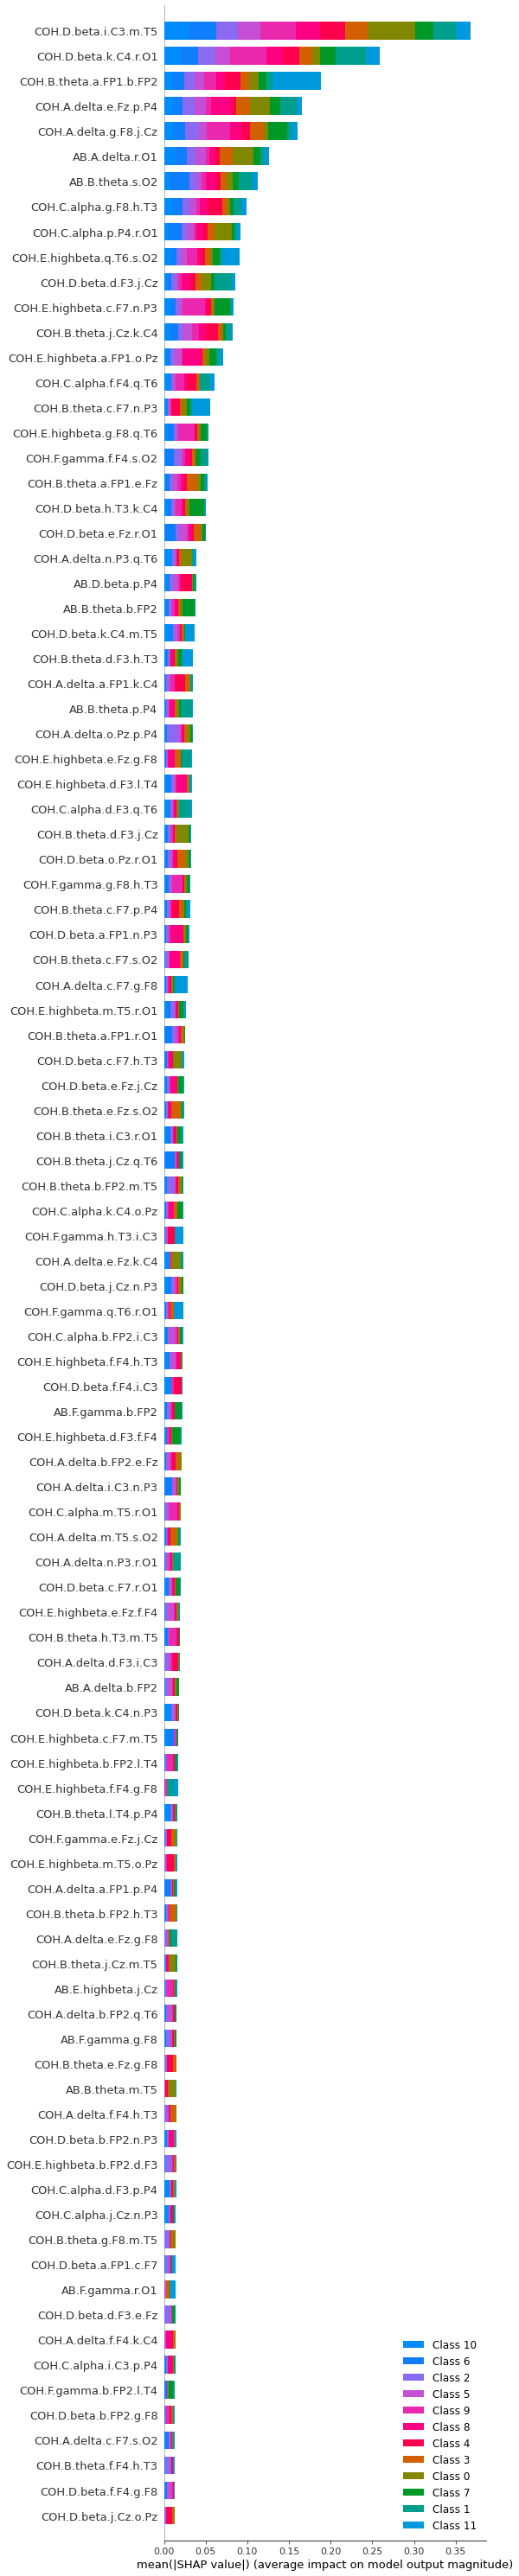

In [31]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [32]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
746,COH.D.beta.i.C3.m.T5,21.978618
768,COH.D.beta.k.C4.r.O1,15.474608
285,COH.B.theta.a.FP1.b.FP2,11.272078
190,COH.A.delta.e.Fz.p.P4,9.898765
209,COH.A.delta.g.F8.j.Cz,9.579277
...,...,...
114,COH.A.delta.a.FP1.b.FP2,0.000000
548,COH.C.alpha.f.F4.s.O2,0.000000
111,AB.F.gamma.q.T6,0.000000
553,COH.C.alpha.g.F8.l.T4,0.000000


In [33]:
# Below I am retrieving the 100 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(100)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['COH.D.beta.i.C3.m.T5',
 'COH.D.beta.k.C4.r.O1',
 'COH.B.theta.a.FP1.b.FP2',
 'COH.A.delta.e.Fz.p.P4',
 'COH.A.delta.g.F8.j.Cz',
 'AB.A.delta.r.O1',
 'AB.B.theta.s.O2',
 'COH.C.alpha.g.F8.h.T3',
 'COH.C.alpha.p.P4.r.O1',
 'COH.E.highbeta.q.T6.s.O2',
 'COH.D.beta.d.F3.j.Cz',
 'COH.E.highbeta.c.F7.n.P3',
 'COH.B.theta.j.Cz.k.C4',
 'COH.E.highbeta.a.FP1.o.Pz',
 'COH.C.alpha.f.F4.q.T6',
 'COH.B.theta.c.F7.n.P3',
 'COH.E.highbeta.g.F8.q.T6',
 'COH.F.gamma.f.F4.s.O2',
 'COH.B.theta.a.FP1.e.Fz',
 'COH.D.beta.h.T3.k.C4',
 'COH.D.beta.e.Fz.r.O1',
 'COH.A.delta.n.P3.q.T6',
 'AB.D.beta.p.P4',
 'AB.B.theta.b.FP2',
 'COH.D.beta.k.C4.m.T5',
 'COH.B.theta.d.F3.h.T3',
 'COH.A.delta.a.FP1.k.C4',
 'AB.B.theta.p.P4',
 'COH.A.delta.o.Pz.p.P4',
 'COH.E.highbeta.e.Fz.g.F8',
 'COH.E.highbeta.d.F3.l.T4',
 'COH.C.alpha.d.F3.q.T6',
 'COH.B.theta.d.F3.j.Cz',
 'COH.D.beta.o.Pz.r.O1',
 'COH.F.gamma.g.F8.h.T3',
 'COH.B.theta.c.F7.p.P4',
 'COH.D.beta.a.FP1.n.P3',
 'COH.B.theta.c.F7.s.O2',
 'COH.A.delta.c.F7.g.F8',


In [34]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,COH.D.beta.i.C3.m.T5,COH.D.beta.k.C4.r.O1,COH.B.theta.a.FP1.b.FP2,COH.A.delta.e.Fz.p.P4,COH.A.delta.g.F8.j.Cz,AB.A.delta.r.O1,AB.B.theta.s.O2,COH.C.alpha.g.F8.h.T3,COH.C.alpha.p.P4.r.O1,COH.E.highbeta.q.T6.s.O2,...,AB.F.gamma.r.O1,COH.D.beta.d.F3.e.Fz,COH.A.delta.f.F4.k.C4,COH.C.alpha.i.C3.p.P4,COH.F.gamma.b.FP2.l.T4,COH.D.beta.b.FP2.g.F8,COH.A.delta.c.F7.s.O2,COH.B.theta.f.F4.h.T3,COH.D.beta.f.F4.g.F8,COH.D.beta.j.Cz.o.Pz
0,16.218621,2.681275,84.738044,7.859443,22.291124,13.233880,9.377386,14.759594,23.566563,38.634100,...,7.455592,76.420754,42.560374,13.003626,19.903286,49.509143,2.169954,14.920500,61.001530,56.507817
1,38.817989,7.090059,87.083141,33.436522,36.215827,14.633266,7.622044,44.309347,34.438731,52.161862,...,3.614011,85.160801,70.406659,37.189089,16.889814,60.076408,0.164333,34.546349,66.431662,41.194640
2,43.228711,8.200263,77.140159,12.260879,29.474025,10.589773,25.846790,18.048481,30.211787,53.495908,...,2.653133,80.889529,61.314896,17.735201,59.145191,52.099333,1.177912,27.781265,62.025455,36.558248
3,56.865740,11.888913,62.238485,10.277232,9.859452,25.223010,24.147011,60.812911,40.853522,76.484074,...,6.042756,80.622375,34.307321,22.962453,24.179054,45.626503,0.805352,40.211151,62.160550,56.385978
4,59.089805,28.960624,83.356702,33.273582,39.123042,19.372897,7.980278,20.585990,36.498651,82.735788,...,1.543027,93.531181,29.770952,67.391154,73.786826,78.305751,6.845353,18.713282,84.185508,65.310981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,75.644710,30.775228,68.800281,40.536599,33.278106,18.814009,7.970765,4.109214,58.492588,27.802459,...,2.074562,93.270299,82.922162,44.602538,11.153778,37.261965,6.653594,51.519512,64.563171,60.738453
941,22.813511,21.289162,89.057117,79.870713,87.955148,12.970757,7.886639,39.217980,52.577085,93.580084,...,1.535240,97.418575,95.131145,16.333799,37.665706,75.394481,75.499847,67.646765,76.206450,56.022632
942,4.221955,0.214814,99.680580,3.941343,21.031960,11.745891,7.781718,57.534001,23.680733,42.383974,...,1.477325,99.758305,60.806045,42.211172,25.474940,40.554031,0.971536,30.920001,58.718163,51.483447
943,30.012224,6.470160,99.614535,33.014293,61.152229,7.808459,10.129412,68.353181,72.223558,23.369230,...,1.357855,63.923314,77.899776,52.380257,14.228094,68.456338,11.636310,58.085827,75.748561,48.510544


In [35]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [36]:
from sklearn import tree

# Importing the decision tree api and setting a default model with decision tree configurations.
model = tree.DecisionTreeClassifier(max_depth=59)

In [37]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=59)

In [38]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.13380281690140844

In [39]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([10,  6,  3, 11, 10,  5,  6,  6,  4, 11,  6,  2,  6, 11,  7,  3,  3,
        8,  9,  7,  8, 11,  7,  6,  1, 11,  3,  4, 11, 11,  6,  7,  4, 10,
        8,  6,  4,  6, 10,  4,  5,  6,  2,  4,  7,  6,  8,  4,  9, 11,  6,
        9,  3,  5,  6,  6,  6,  7,  1,  4,  1,  7,  7,  6,  3,  4, 11,  6,
        6,  5,  8,  6,  3,  4,  5,  8,  8,  6,  6, 11,  8, 11,  6,  7,  4,
        5,  6,  6,  5,  5,  6,  7,  8,  2,  6, 11,  6,  4,  7,  6, 11,  9,
        7,  3,  6,  7,  7,  6, 11,  6,  6,  4, 11,  7,  3,  7,  8,  6, 11,
        6,  8, 12,  7,  5,  4, 10,  9,  3,  1,  6,  9, 12,  9,  5, 10,  4,
       11,  9,  8,  5, 10,  5,  4,  3, 11,  6,  3,  2,  5,  4,  6, 11,  9,
        8,  1,  8,  3,  3, 11,  4,  5,  6,  3,  8,  5,  2,  7,  7, 11,  4,
        8,  7,  3,  7, 11,  7,  3,  6,  6,  4,  9, 11,  8,  4,  6, 10, 11,
       12, 10,  5, 10,  3,  6,  3, 11, 10, 10, 12,  3, 11,  6,  4, 11, 10,
       10,  4,  7,  7,  7,  3, 12, 10, 10,  6, 10,  6,  8, 11,  6,  8,  6,
        8,  1,  4,  4,  6

In [40]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 0,  0,  0,  1,  1,  1,  0,  1,  1,  2,  3,  0],
       [ 0,  0,  0,  2,  1,  5,  2,  2,  0,  0,  1,  0],
       [ 0,  0,  1,  3,  1,  3,  2,  2,  2,  3,  6,  2],
       [ 1,  2,  0,  4,  3,  6,  3,  1,  1,  2,  1,  2],
       [ 0,  2,  2,  4,  4,  9,  2,  0,  1,  2,  2,  0],
       [ 1,  2,  9,  8,  6, 15,  4,  2,  3,  2,  8,  1],
       [ 3,  1,  4,  4,  0,  4,  4,  4,  0,  3,  4,  0],
       [ 0,  0,  0,  0,  2,  4,  2,  2,  1,  0,  1,  0],
       [ 0,  0,  1,  0,  2,  3,  4,  5,  1,  0,  3,  0],
       [ 0,  1,  2,  0,  1,  3,  0,  0,  0,  1,  3,  0],
       [ 1,  1,  3,  3,  1,  6,  4,  4,  1,  4,  4,  2],
       [ 1,  0,  2,  2,  0,  2,  2,  0,  1,  1,  1,  2]], dtype=int64)

Text(87.0, 0.5, 'True value')

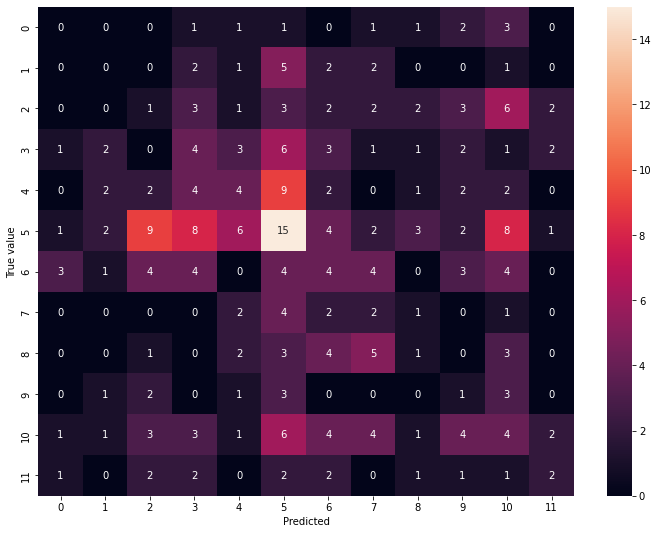

In [41]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,4) & (5,10) & (3,5) with 10,10,10 incorrect classifications represents how bipolar & schizophrenai & behavioural with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [42]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        13
           3       0.04      0.04      0.04        25
           4       0.13      0.15      0.14        26
           5       0.18      0.14      0.16        28
           6       0.25      0.25      0.25        61
           7       0.14      0.13      0.13        31
           8       0.09      0.17      0.11        12
           9       0.08      0.05      0.06        19
          10       0.05      0.09      0.06        11
          11       0.11      0.12      0.11        34
          12       0.22      0.14      0.17        14

    accuracy                           0.13       284
   macro avg       0.11      0.11      0.10       284
weighted avg       0.14      0.13      0.13       284



In [43]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html
# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html